In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
climate = pd.read_csv('austin_weather.csv')

In [3]:
climate.shape

(578, 22)

In [4]:
climate.describe()

,Year,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,WindHighMPH,WindAvgMPH
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,2016.366782,82.532872,72.231834,61.420415,62.920415,58.262976,52.807958,88.065744,66.731834,44.820069,30.098789,30.009792,29.919256,13.171280,4.989619
std,0.482344,13.270410,12.760080,13.172291,13.079038,14.278004,15.499968,11.016728,12.083436,16.233953,0.178248,0.173172,0.174906,3.330455,2.039445
min,2016.000000,34.000000,29.000000,19.000000,13.000000,11.000000,6.000000,37.000000,28.000000,15.000000,29.630000,29.560000,29.410000,7.000000,1.000000
25%,2016.000000,75.000000,64.000000,52.000000,57.000000,50.000000,41.000000,85.000000,59.000000,33.000000,29.980000,29.900000,29.812500,10.500000,3.000000
50%,2016.000000,84.000000,74.000000,63.500000,67.000000,62.000000,58.000000,91.000000,67.000000,44.000000,30.070000,29.990000,29.900000,13.000000,5.000000
75%,2017.000000,93.000000,83.000000,74.000000,74.000000,70.000000,66.000000,94.000000,74.000000,54.000000,30.190000,30.090000,30.010000,15.000000,6.000000
max,2017.000000,107.000000,93.000000,81.000000,80.000000,76.000000,75.000000,100.000000,97.000000,93.000000,30.830000,30.740000,30.610000,26.000000,12.000000


In [5]:
climate.isnull().any()

Date                          False
Year                          False
TempHighF                     False
TempAvgF                      False
TempLowF                      False
DewPointHighF                 False
DewPointAvgF                  False
DewPointLowF                  False
HumidityHighPercent           False
HumidityAvgPercent            False
HumidityLowPercent            False
SeaLevelPressureHighInches    False
SeaLevelPressureAvgInches     False
SeaLevelPressureLowInches     False
VisibilityHighMiles           False
VisibilityAvgMiles            False
VisibilityLowMiles            False
WindHighMPH                   False
WindAvgMPH                    False
WindGustMPH                   False
PrecipitationSumInches        False
Events                        False
dtype: bool

In [6]:
climate.nunique()

Date                          578
Year                            2
TempHighF                      65
TempAvgF                       56
TempLowF                       55
DewPointHighF                  57
DewPointAvgF                   60
DewPointLowF                   65
HumidityHighPercent            51
HumidityAvgPercent             65
HumidityLowPercent             72
SeaLevelPressureHighInches     90
SeaLevelPressureAvgInches      87
SeaLevelPressureLowInches      91
VisibilityHighMiles             3
VisibilityAvgMiles              9
VisibilityLowMiles             12
WindHighMPH                    18
WindAvgMPH                     12
WindGustMPH                    34
PrecipitationSumInches         71
Events                          7
dtype: int64

In [7]:
climate=climate.drop(['SeaLevelPressureHighInches','SeaLevelPressureAvgInches','SeaLevelPressureLowInches',
                      'VisibilityHighMiles','VisibilityAvgMiles','VisibilityLowMiles','WindHighMPH','WindAvgMPH',
                      'WindGustMPH','PrecipitationSumInches','Events'],axis=1)

In [8]:
climate.shape

(578, 11)

In [9]:
climate.head()

,Date,Year,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent
0,1/1/2016,2016,48,46,44,36,33,28,66,60,53
1,1/2/2016,2016,47,45,42,42,34,29,100,77,53
2,1/3/2016,2016,62,52,41,43,39,32,96,70,43
3,1/4/2016,2016,58,48,37,33,31,30,79,58,36
4,1/5/2016,2016,56,46,36,40,36,32,85,68,51


In [10]:
climate_num = climate.select_dtypes(include=['float64','int64'])

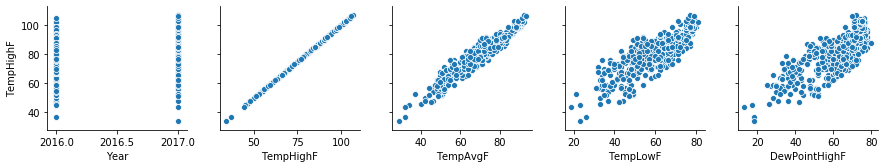

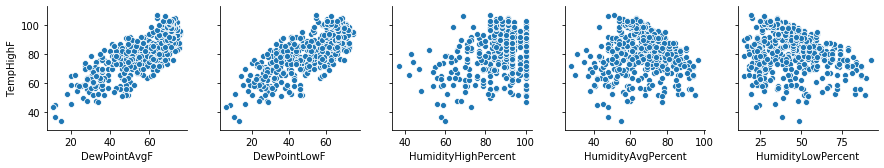

In [11]:
for i in range(0,len(climate_num.columns),5):
    sns.pairplot(climate_num, y_vars=['TempHighF'],x_vars=climate_num.columns[i:i+5])

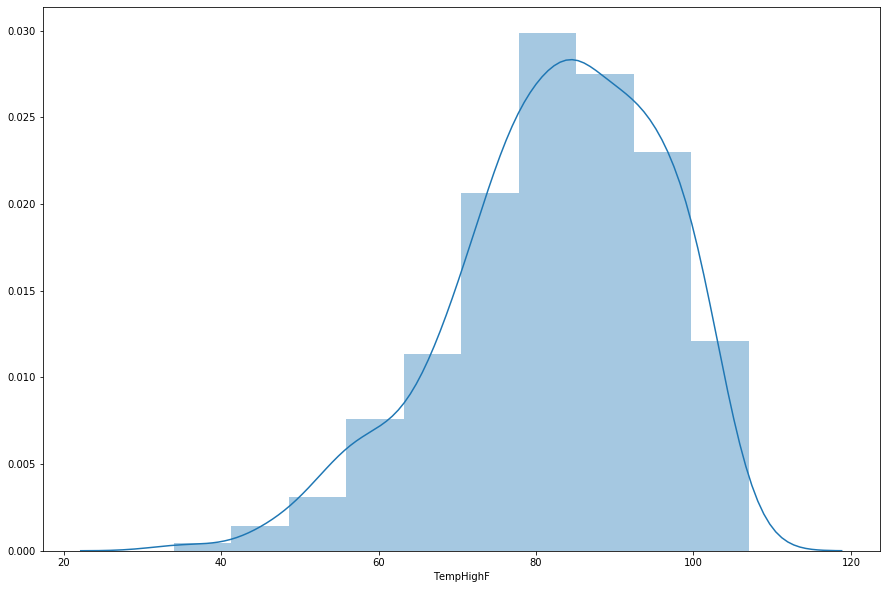

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(climate['TempHighF'],bins=10)

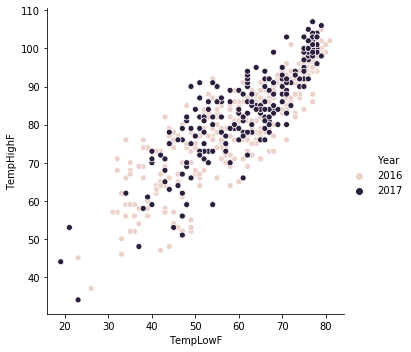

In [13]:
sns.relplot(x='TempLowF',y='TempHighF',hue = 'Year',data=climate)

In [14]:
X = climate['TempLowF'].values.reshape(-1,1)
Y = climate['TempHighF'].values.reshape(-1,1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[30.09021997]
[[0.85594133]]


In [18]:
y_pred = regressor.predict(X_test)

In [19]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,84,84.870465
1,92,93.429878
2,62,70.319462
3,79,74.599169
4,102,95.141761
...,...,...
111,74,68.607580
112,92,92.573937
113,54,61.760049
114,88,84.014524


In [20]:
df1 = df.head(25)

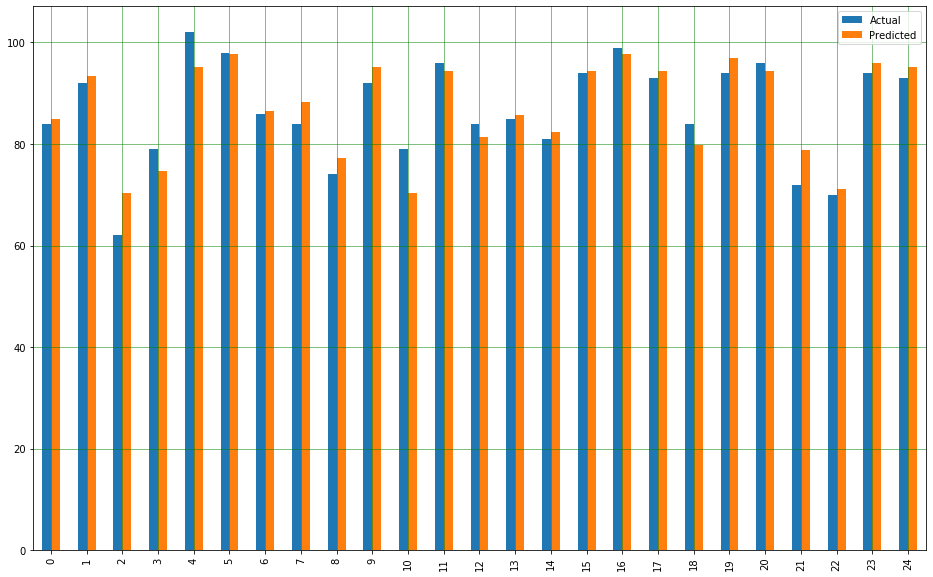

In [21]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

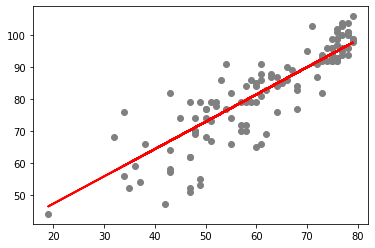

In [22]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.329527861183691
Mean Squared Error: 51.46967457422366
Root Mean Squared Error: 7.174236863543304
